In [199]:
import numpy as np
import pandas as pd
import json
import datetime as dt
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 12})
np.set_printoptions(suppress=True)

In [200]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [201]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   Int64  
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   Int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBilling  7043 non-null   string 


## 1. data cleaning

In [202]:
df['customerID'].nunique() # no duplicates

7043

In [203]:
df['TotalCharges'].replace(' ',None, inplace = True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

### cat col

In [205]:
# cat col
cat_col = [col for col in df.select_dtypes(include='string').columns if col not in ['customerID','gender']]
for c in cat_col:
    print(f'Value counts for {c}'.center(50,'-'))
    print(df[c].value_counts(normalize=True, dropna=False))
    print('')

-------------Value counts for Partner-------------
No     0.516967
Yes    0.483033
Name: Partner, dtype: Float64

-----------Value counts for Dependents------------
No     0.700412
Yes    0.299588
Name: Dependents, dtype: Float64

----------Value counts for PhoneService-----------
Yes    0.903166
No     0.096834
Name: PhoneService, dtype: Float64

----------Value counts for MultipleLines----------
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: Float64

---------Value counts for InternetService---------
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: Float64

---------Value counts for OnlineSecurity----------
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: Float64

----------Value counts for OnlineBackup-----------
No                      0.43845
Yes                    0.344881
No internet s

In [ ]:
df['isMale'] = np.where(df['gender']=='Male',1,0)
df.drop(['gender'],axis=1, inplace=True)
# yes no col
# OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies are dependent on InternetService
binary_col = ['Partner',
     'Dependents',
     'PhoneService',
     'MultipleLines',
     'OnlineSecurity',
     'OnlineBackup',
     'DeviceProtection',
     'TechSupport',
     'StreamingTV',
     'StreamingMovies',
     'PaperlessBilling',
     'Churn']
df[binary_col] = np.where(df[binary_col]=='Yes',1,0)
rename_map = {c:'has'+c for c in binary_col if c !='Churn'}
df.rename(rename_map, axis=1, inplace=True)

df[['InternetService','Contract','PaymentMethod']].replace(' ','_',regex=True,inplace=True)


### num col

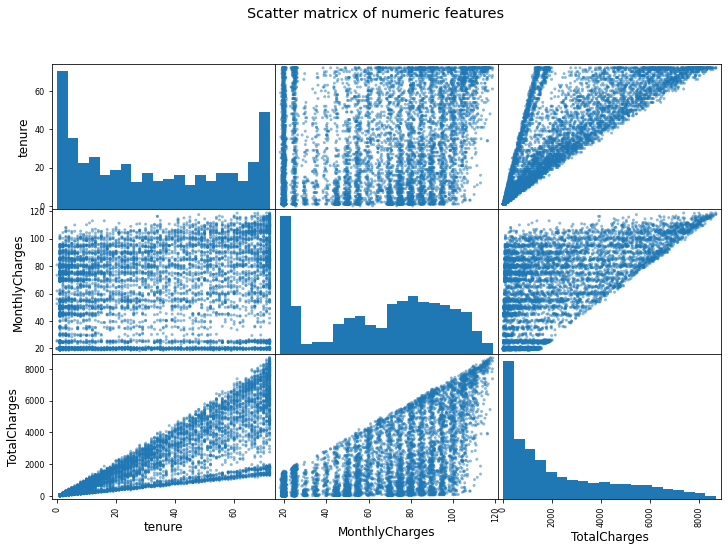

In [207]:
from pandas.plotting import scatter_matrix
num_col = ['tenure','MonthlyCharges','TotalCharges']
scatter_matrix(df[num_col],figsize=(12,8),
              hist_kwds={'bins':20})
plt.suptitle('Scatter matricx of numeric features')
plt.show()
## strong correlation between tenure & total charges -> remove total charges in model

In [194]:
data.head()

,SeniorCitizen,hasPartner,hasDependents,tenure,hasPhoneService,hasMultipleLines,hasOnlineSecurity,hasOnlineBackup,hasDeviceProtection,hasTechSupport,...,isMale,InternetService_DSL,InternetService_Fiber_optic,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
2499,0,0,1,41,1,0,1,1,1,0,...,1,1,0,0,1,0,0,0,0,1
5807,0,0,0,57,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5118,0,1,0,42,1,1,0,0,1,1,...,0,0,1,1,0,0,0,1,0,0
275,0,1,0,5,1,1,0,1,0,1,...,1,0,1,1,0,0,0,0,1,0
1350,0,1,0,67,1,1,1,1,1,0,...,0,1,0,0,0,1,0,0,0,1


save cleaned data

In [208]:
import os
to_dir = os.path.join(os.getcwd(),'clean_data')
if not os.path.exists(to_dir):
    os.makedirs(to_dir)

df.to_pickle(os.path.join(to_dir,'clean_df.pkl'))

## 2. dataprep & EDA

In [209]:
# read data
df = pd.read_pickle(os.path.join(to_dir,'clean_df.pkl'))


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7043 non-null   string 
 1   SeniorCitizen        7043 non-null   Int64  
 2   hasPartner           7043 non-null   int32  
 3   hasDependents        7043 non-null   int32  
 4   tenure               7043 non-null   Int64  
 5   hasPhoneService      7043 non-null   int32  
 6   hasMultipleLines     7043 non-null   int32  
 7   InternetService      7043 non-null   string 
 8   hasOnlineSecurity    7043 non-null   int32  
 9   hasOnlineBackup      7043 non-null   int32  
 10  hasDeviceProtection  7043 non-null   int32  
 11  hasTechSupport       7043 non-null   int32  
 12  hasStreamingTV       7043 non-null   int32  
 13  hasStreamingMovies   7043 non-null   int32  
 14  Contract             7043 non-null   string 
 15  hasPaperlessBilling  7043 non-null   i

### train test split

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['customerID','Churn','TotalCharges'],axis=1), 
                                                    df['Churn'],
                                                    test_size=.2, 
                                                    stratify=df['Churn'], 
                                                    shuffle=True,
                                                    random_state=0)
X_train.head()

,SeniorCitizen,hasPartner,hasDependents,tenure,hasPhoneService,hasMultipleLines,InternetService,hasOnlineSecurity,hasOnlineBackup,hasDeviceProtection,hasTechSupport,hasStreamingTV,hasStreamingMovies,Contract,hasPaperlessBilling,PaymentMethod,MonthlyCharges,isMale
2499,0,0,1,41,1,0,DSL,1,1,1,0,1,0,One_year,0,Mailed_check,70.2,1
5807,0,0,0,57,1,0,No,0,0,0,0,0,0,Two_year,0,Credit_card_(automatic),18.8,1
5118,0,1,0,42,1,1,Fiber_optic,0,0,1,1,0,0,Month-to-month,1,Credit_card_(automatic),85.9,0
275,0,1,0,5,1,1,Fiber_optic,0,1,0,1,0,0,Month-to-month,1,Electronic_check,85.4,1
1350,0,1,0,67,1,1,DSL,1,1,1,0,0,0,Two_year,0,Mailed_check,65.65,0


### relationship between X and y

In [87]:
# imbalance target
np.vstack([y_train.value_counts(),y_train.value_counts(normalize=True)])

array([[4139.        , 1495.        ],
       [   0.73464679,    0.26535321]])

In [88]:
data = X_train.copy() # create a copy

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2499 to 6513
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5634 non-null   Int64  
 1   hasPartner                               5634 non-null   int32  
 2   hasDependents                            5634 non-null   int32  
 3   tenure                                   5634 non-null   Int64  
 4   hasPhoneService                          5634 non-null   int32  
 5   hasMultipleLines                         5634 non-null   int32  
 6   hasOnlineSecurity                        5634 non-null   int32  
 7   hasOnlineBackup                          5634 non-null   int32  
 8   hasDeviceProtection                      5634 non-null   int32  
 9   hasTechSupport                           5634 non-null   int32  
 10  hasStreamingTV                           5634

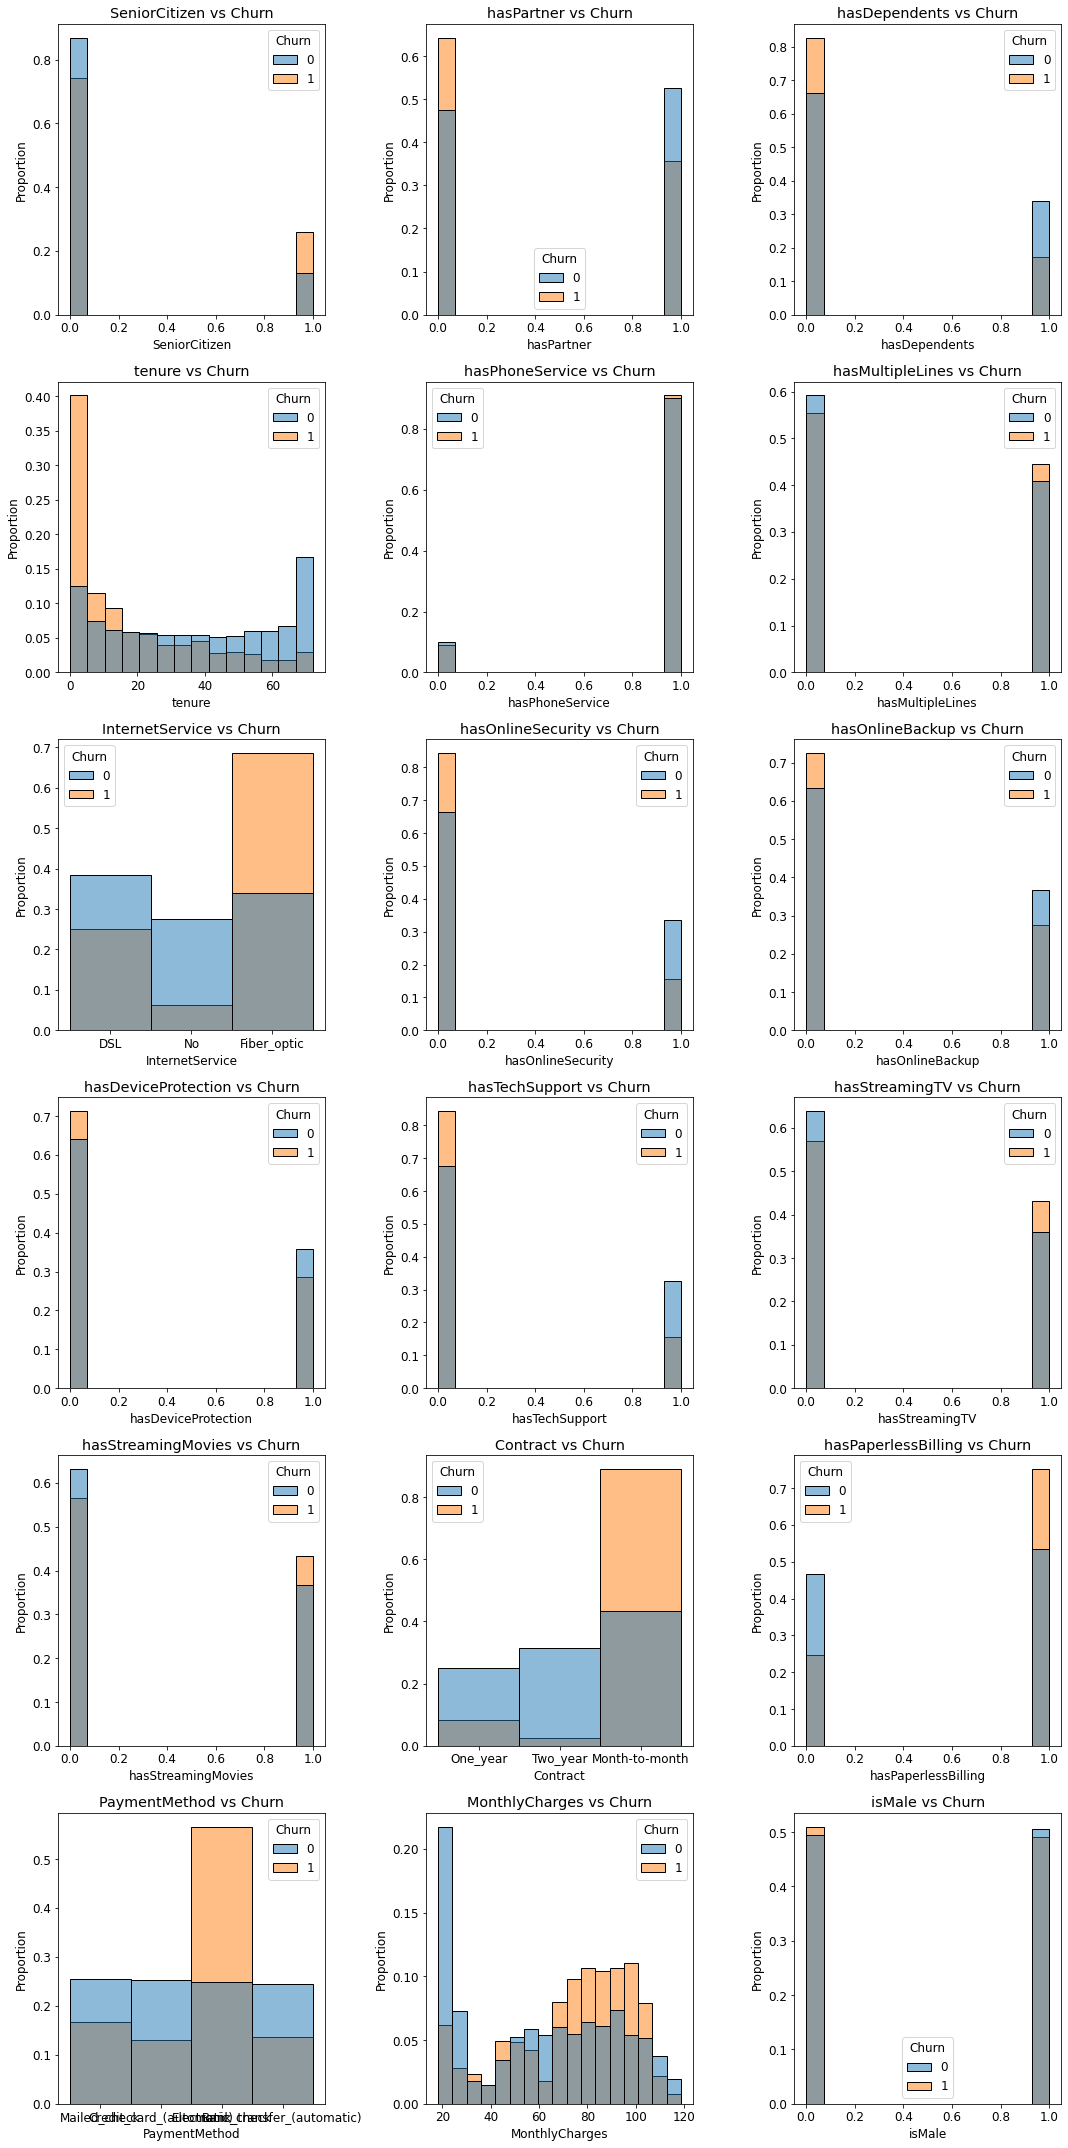

In [90]:
## distribution of column values - all look related to churn
list_x = [x for x in data.columns]
plt.figure(figsize=(15,5*(int(len(list_x)/3)+(len(list_x)%3>0))))
for i,col in enumerate(list_x,1):
    plt.subplot((int(len(list_x)/3)+(len(list_x)%3>0)),3,i)
    plt.title(f"{col} vs Churn")
    sns.histplot(x=data[col], hue=y_train,stat='proportion',common_norm=False)
    plt.tight_layout()

In [98]:
data['InternetService'].replace('No',None,inplace=True)
# one-hot encoding for categorical features
cat_col = data.select_dtypes(include='string').columns
for col in cat_col:
    dum = pd.get_dummies(data[col],prefix=col)
    data = pd.concat([data,dum],axis=1)
data.drop(cat_col,axis=1,inplace=True)    

In [101]:
def prepare_X_data(data):
    '''
    accepts dataframe of X data
    outputs array of prepared data, list of features
    '''
    data['InternetService'].replace('No',None,inplace=True)
    # one-hot encoding for categorical features
    cat_col = data.select_dtypes(include='string').columns
    for col in cat_col:
        dum = pd.get_dummies(data[col],prefix=col)
        data = pd.concat([data,dum],axis=1)
    data.drop(cat_col,axis=1,inplace=True)
    list_feat = data.columns.tolist()
    data = data.values
    return data, list_feat


In [103]:
X_train_prepared, list_feat = prepare_X_data(X_train)
X_train_prepared.shape

(5634, 24)

### build baseline model

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  ## param for impalance: class_weight
from xgboost import XGBClassifier  ## param for impalance: scale_pos_weight
# from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc, classification_report
from sklearn.model_selection import cross_validate

In [107]:
models = [DecisionTreeClassifier(class_weight='balanced'), 
          RandomForestClassifier(class_weight='balanced'), 
          XGBClassifier(scale_pos_weight=2)]  ## neg_count / pos_counts
scoring=['roc_auc','recall','precision']
all_scores = []
for m in models:
    cv_scores = cross_validate(m, X_train_prepared, y_train, scoring=scoring, cv=3, return_train_score=True, n_jobs=-1)  # cv int: stratifiedKfold
    cv_scores['model'] = np.repeat(str(m).split('.'),3)
    all_scores.append(cv_scores)
pd.concat([pd.DataFrame(i) for i in all_scores])

,fit_time,score_time,test_roc_auc,train_roc_auc,test_recall,train_recall,test_precision,train_precision,model
0,0.033861,0.000000,0.667050,0.999981,0.502008,1.000000,0.520833,0.988107,DecisionTreeClassifier(class_weight='balanced')
1,0.016047,0.022783,0.671235,0.999985,0.508032,1.000000,0.523810,0.990070,DecisionTreeClassifier(class_weight='balanced')
2,0.007037,0.016770,0.646876,0.999991,0.472946,1.000000,0.486598,0.992032,DecisionTreeClassifier(class_weight='balanced')
0,0.459398,0.101645,0.824312,0.999937,0.497992,0.996991,0.642487,0.992016,RandomForestClassifier(class_weight='balanced')
1,0.469033,0.113477,0.833626,0.999918,0.457831,0.997994,0.636872,0.993014,RandomForestClassifier(class_weight='balanced')
2,0.487696,0.108706,0.810427,0.999796,0.480962,0.998996,0.600000,0.994006,RandomForestClassifier(class_weight='balanced')
0,0.690154,0.015618,0.830392,0.995751,0.626506,0.987964,0.588679,0.886589,"XGBClassifier(base_score=None, booster=None, c..."
1,0.658898,0.031256,0.829345,0.992051,0.636546,0.980943,0.575318,0.853403,"XGBClassifier(base_score=None, booster=None, c..."
2,0.674523,0.031250,0.806966,0.996599,0.587174,0.990964,0.561303,0.908004,"XGBClassifier(base_score=None, booster=None, c..."


XGBoost has the highest recall - TP/actualP -> we want to capture as many churn as possible
### grid search for XGboost

In [114]:
y_train.values.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [120]:
## grid search
# XGB above is still overfitted
from sklearn.model_selection import GridSearchCV
xgbc = XGBClassifier(objective='binary:logistic', 
                     seed=1, 
                     subsample=0.9, 
                     colsample_bytree=0.5,
                    use_label_encoder=False)


param_grid = [
#     {'scale_pos_weight': [1,2.5,4], 'eta':[0.01, 0.05, 0.1], 'max_depth':[3,5,7], 'gamma':[0,0.25,1]}
        {'scale_pos_weight': [1], 'eta':[0.05], 'max_depth':[4], 'gamma':[2,3]}

  ]

# rfc1 = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(xgbc, param_grid, cv=3,
                           scoring='roc_auc',
                           return_train_score=True,
                           verbose=0
                          )
grid_search.fit(X_train_prepared, y_train.values.astype(int))

[23:45:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:00] WARNING:

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...00, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
    

In [116]:
# round 1
print(grid_search.best_params_)
print(grid_search.best_score_)

{'eta': 0.05, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
0.8480693656607521


In [119]:
# round 2
print(grid_search.best_params_)
print(grid_search.best_score_)

{'eta': 0.05, 'gamma': 1.5, 'max_depth': 4, 'scale_pos_weight': 1}
0.8482926940029789


In [121]:
# round 3
print(grid_search.best_params_)
print(grid_search.best_score_)

{'eta': 0.05, 'gamma': 2, 'max_depth': 4, 'scale_pos_weight': 1}
0.8483838657203527


### get performance of best XGB

In [236]:
def model_report(model, X, true_y):
    pred=model.predict(X)
    print(classification_report(true_y, pred))
    ConfusionMatrixDisplay.from_predictions(true_y, pred)
    plt.suptitle('Confusion matrix')
    plt.show()

In [238]:
best_xgbc = XGBClassifier(objective='binary:logistic', 
                         seed=1, 
#                          subsample=0.9, 
                         colsample_bytree=0.5,
                         use_label_encoder=False,
                         eta=0.05, gamma=2, max_depth=4,scale_pos_weight=2.7,
                         verbosity = 0)
best_xgbc.fit(X_train_prepared, y_train.values.astype(int))
# pred_train=best_xgbc.predict(X_train_prepared)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eta=0.05, gamma=2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0500000007, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=2.7,
              seed=1, subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      4139
           1       0.54      0.83      0.66      1495

    accuracy                           0.77      5634
   macro avg       0.73      0.79      0.74      5634
weighted avg       0.82      0.77      0.78      5634



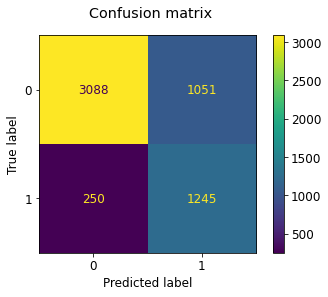

In [239]:
# evaluate on trainset
model_report(best_xgbc, X_train_prepared, y_train)

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.81      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



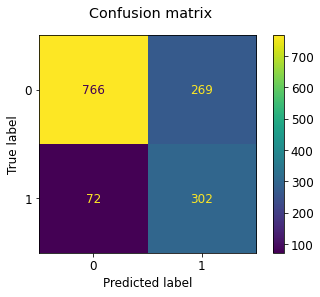

In [240]:
# evaluate on test set
X_test_prepared, list_feat = prepare_X_data(X_test)
# pred_test=best_xgbc.predict(X_test_prepared)
model_report(best_xgbc,X_test_prepared,y_test)

not overfitted anymore

In [231]:
def plot_roc(model,X,true_y):
    probs = model.predict_proba(X)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(true_y, preds)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5,5))
    plt.title('ROC curve')
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

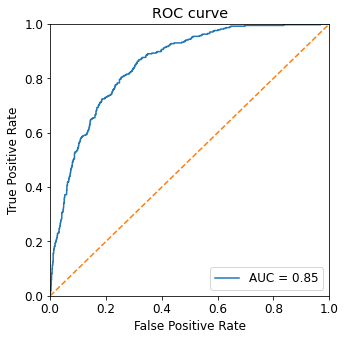

In [232]:
plot_roc(best_xgbc,X_test_prepared,y_test)

### feature importance

In [213]:
pd.DataFrame(best_xgbc.feature_importances_, index=list_feat).sort_values(0,ascending=False)

,0
Contract_Month-to-month,0.440413
Contract_Two_year,0.131109
PaymentMethod_Electronic_check,0.065170
InternetService_Fiber_optic,0.045424
tenure,0.042514
Contract_One_year,0.035898
InternetService_DSL,0.026415
hasStreamingMovies,0.025506
hasOnlineSecurity,0.022809
MonthlyCharges,0.022585


In [214]:
model_to_dir = os.path.join(os.getcwd(),'models')
if not os.path.exists(model_to_dir):
    os.makedirs(model_to_dir)

In [218]:
joblib.dump(best_xgbc, os.path.join(model_to_dir,"best_xgbc.sav"))
# loaded_model = joblib.load(os.path.join(model_to_dir,"best_xgbc.sav"))

['E:\\DS\\projects\\classification_case\\models\\best_xgbc.sav']

### tune random forest

In [153]:
rfc = RandomForestClassifier(
                     random_state=1, 
                     class_weight='balanced')
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [167]:
## grid search
rfc = RandomForestClassifier(
                     random_state=1, 
                     class_weight='balanced')

param_grid = [
        {'max_features': [5], 'min_samples_split':[18,20], 'n_estimators':[350,400], 'n_jobs': [-1]}
  ]

grid_search_rfc = GridSearchCV(rfc, param_grid, cv=3,
                           scoring='roc_auc',
                           return_train_score=True,
                           verbose=0
                          )
grid_search_rfc.fit(X_train_prepared, y_train.values.astype(int))

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             param_grid=[{'max_features': [5], 'min_samples_split': [18, 20],
                          'n_estimators': [350, 400], 'n_jobs': [-1]}],
             return_train_score=True, scoring='roc_auc')

In [157]:
# round 1
print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_score_)

{'max_features': 5, 'min_samples_split': 6, 'n_estimators': 180, 'n_jobs': -1}
0.836584915180671


In [159]:
# round 2
print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_score_)

{'max_features': 5, 'min_samples_split': 8, 'n_estimators': 200, 'n_jobs': -1}
0.8394383325825313


In [166]:
# round 4
print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_score_)

{'max_features': 5, 'min_samples_split': 16, 'n_estimators': 300, 'n_jobs': -1}
0.8438826730061356


In [168]:
# round 5
print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_score_)

{'max_features': 5, 'min_samples_split': 20, 'n_estimators': 400, 'n_jobs': -1}
0.8445925221817681


### try SMOTE

In [181]:
num_col = ['tenure','MonthlyCharges']
idx_cat_col = [list_feat.index(col) for col in list_feat if col not in num_col]

In [182]:
idx_cat_col

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [176]:
 y_train.values

array([0, 0, 0, ..., 0, 0, 0])

In [172]:
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline ## imblearn pipeline does not re-sample test data (when called transform() or predict())

In [183]:
over_sampler = SMOTENC(categorical_features=idx_cat_col, random_state=42, sampling_strategy=1)
models = [XGBClassifier(), RandomForestClassifier()]
scoring=['roc_auc','recall','precision']
all_scores_os = []
for m in models:
    pipe_os = Pipeline([('over_sampler', over_sampler), 
                 (str(m).split('.')[0], m)])
    cv_scores = cross_validate(pipe_os, X_train_prepared, y_train.values, scoring=scoring, cv=3, return_train_score=True, n_jobs=-1)  # cv int: stratifiedKfold
    cv_scores['model'] = np.repeat(str(m).split('.'),3)
    all_scores_os.append(cv_scores)

In [185]:
pd.concat([pd.DataFrame(i) for i in all_scores_os])

,fit_time,score_time,test_roc_auc,train_roc_auc,test_recall,train_recall,test_precision,train_precision,model
0,2.666998,0.027001,0.823948,0.984479,0.636546,0.928786,0.581651,0.856614,"XGBClassifier(base_score=None, booster=None, c..."
1,2.646997,0.030999,0.820082,0.981593,0.600402,0.920762,0.556797,0.839122,"XGBClassifier(base_score=None, booster=None, c..."
2,2.585997,0.029001,0.808510,0.985617,0.591182,0.942771,0.551402,0.861468,"XGBClassifier(base_score=None, booster=None, c..."
0,2.311470,0.104002,0.815511,0.999915,0.602410,0.993982,0.560748,0.995980,RandomForestClassifier()
1,2.267471,0.108998,0.820943,0.999957,0.578313,0.997994,0.574850,0.993014,RandomForestClassifier()
2,2.233470,0.108999,0.813431,0.999881,0.605210,0.997992,0.566604,0.994995,RandomForestClassifier()


In [187]:
# grid search 
over_sampler = SMOTENC(categorical_features=idx_cat_col, random_state=42, n_jobs=-1)

model = XGBClassifier(objective='binary:logistic', 
                         seed=1, 
#                          subsample=0.9, 
#                          colsample_bytree=0.5,
                         use_label_encoder=False,
#                          eta=0.05, gamma=2, max_depth=4,scale_pos_weight=2.7,
                         verbosity = 0)


In [190]:
pipe_os = Pipeline([('oversampler', over_sampler), 
                 ('model', model)])
param_grid = {
    'oversampler__sampling_strategy':[0.9,0.7], 'oversampler__k_neighbors':[5,6,8],
            'model__eta':[0.05], 'model__max_depth':[3], 'model__gamma':[1,1.5,2]
}


grid_search_os = GridSearchCV(pipe_os, param_grid, cv=3,
                           scoring='roc_auc',
                           return_train_score=True,
                           verbose=0
                          )
grid_search_os.fit(X_train_prepared, y_train.values.astype(int))

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('oversampler',
                                        SMOTENC(categorical_features=[0, 1, 2,
                                                                      4, 5, 6,
                                                                      7, 8, 9,
                                                                      10, 11,
                                                                      12, 14,
                                                                      15, 16,
                                                                      17, 18,
                                                                      19, 20,
                                                                      21, 22,
                                                                      23],
                                                random_state=42)),
                                       ('model',
                              

In [189]:
# round 1
print(grid_search_os.best_params_)
print(grid_search_os.best_score_) 

{'model__eta': 0.05, 'model__gamma': 2, 'model__max_depth': 3, 'oversampler__k_neighbors': 6, 'oversampler__sampling_strategy': 0.8}
0.8448921560915167


In [191]:
# round 2
print(grid_search_os.best_params_)
print(grid_search_os.best_score_)

{'model__eta': 0.05, 'model__gamma': 2, 'model__max_depth': 3, 'oversampler__k_neighbors': 6, 'oversampler__sampling_strategy': 0.7}
0.8450544691068328


SMOTE is not improving the prediction much, so we don't use it.

### try feature selection